In [152]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/arimorcos/Github/getRedditDataset/')
from celebReddit import countMisspellings, countWords
import redditDB
import datetime
from matplotlib import pyplot as pp
from matplotlib import colorbar as cb
import numpy as np
import pandas as PD
import scipy
from scipy import spatial
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
""" Establish database connection """
db = redditDB.RedditDB('March2-8_Top200')

In [3]:
""" Get comments from subreddits """
subList = db.getSubreddits()
comments = db.getSubredditCommentText(subList[0])

In [8]:
""" Strip formatting """ 
comments = [''.join(s for s in comment if ord(s)>31 and ord(s)<126) for comment in comments]

In [22]:
""" Concatenate all comments together and split into individual words """ 
allComments = " ".join(comments)
allWords = allComments.split()
allWords = [word.lower() for word in allWords]

In [80]:
""" Enumerate words to get list and values """
def countNWords(allWords):
    wordCounts = {}
    for word in allWords:
        if word in wordCounts:
            wordCounts[word] += 1 
        else: 
            wordCounts[word] = 1
    return wordCounts

In [269]:
""" sort by values and get 100 most frequent words""" 
sortedWords = sorted(wordCounts, key=wordCounts.get, reverse=True)
mostFreqWords = sortedWords[0:100]

In [44]:
freqWordCounts = [wordCounts[word] for word in mostFreqWords]

In [276]:
usedSubs = subList[0:50]
allCounts = np.zeros(shape=(len(mostFreqWords) ,len(usedSubs)))
subInd = 0
for sub in usedSubs: 
    
    # get comments 
    comments = db.getSubredditCommentText(sub)
    comments = [''.join(s for s in comment if ord(s)>31 and ord(s)<126) for comment in comments]
    
    # convert to all words
    allComments = " ".join(comments)
    allWords = allComments.split()
    allWords = [word.lower() for word in allWords]
    
    # count words 
    wordCounts = countNWords(allWords)
    
    # add in missing frequent words 
    
    
    # get freqWordCounts 
    freqWordCounts = [wordCounts[word] if word in wordCounts else 0 for word in mostFreqWords ]
    
    # concatenate 
    allCounts[:,subInd] = freqWordCounts
    
    # increment subInd
    subInd += 1    

In [346]:
""" get pairwise distance """
normMeans = np.mean(allCounts, axis=1)
normCounts = np.transpose(np.divide(np.transpose(allCounts), normMeans))
distVec = spatial.distance.pdist(np.transpose(normCounts), 'euclidean')
distMat = spatial.distance.squareform(distVec)

In [185]:
x = np.array([[1, 2, 3], [3, 4, 5]])
print (np.mean(x,axis=1))
np.transpose(np.divide(np.transpose(x), np.mean(x, axis=1)))

[ 2.  4.]


array([[ 0.5 ,  1.  ,  1.5 ],
       [ 0.75,  1.  ,  1.25]])

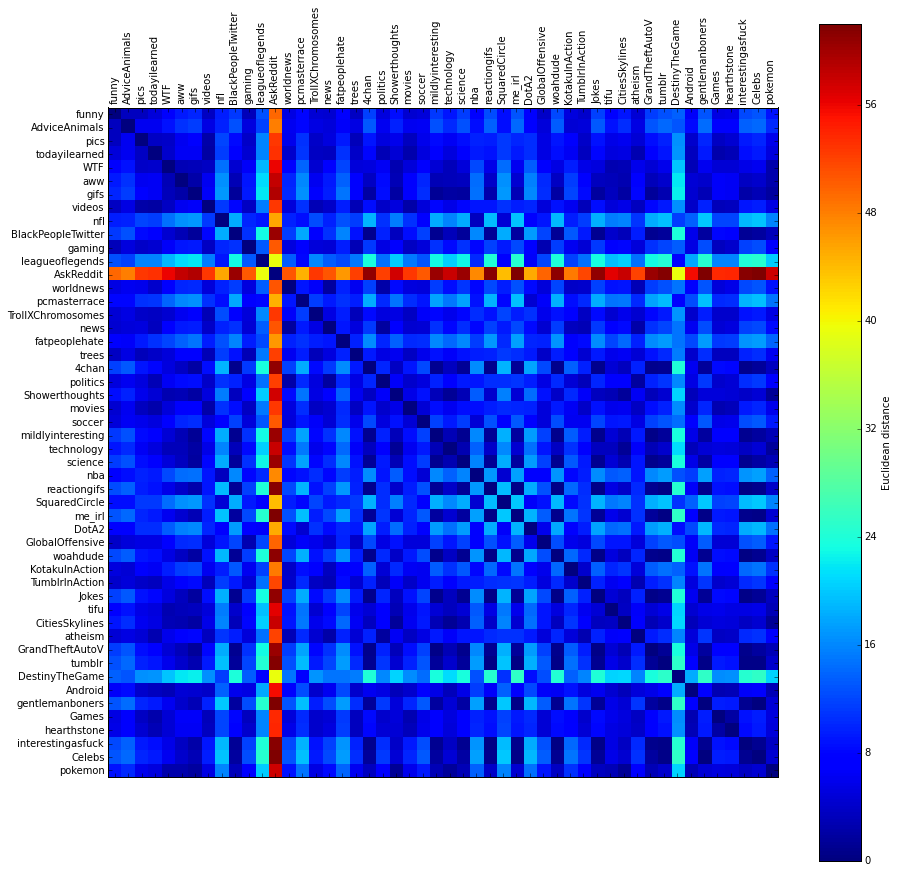

In [279]:
fig, ax = pp.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
axMat = ax.matshow(distMat)
ax.set_xticks(range(len(distMat)))
ax.set_xticklabels(subList, rotation=90);
ax.set_yticks(range(len(distMat)))
ax.set_yticklabels(subList);
cbar = fig.colorbar(axMat)
cbar.set_label('Euclidean distance')

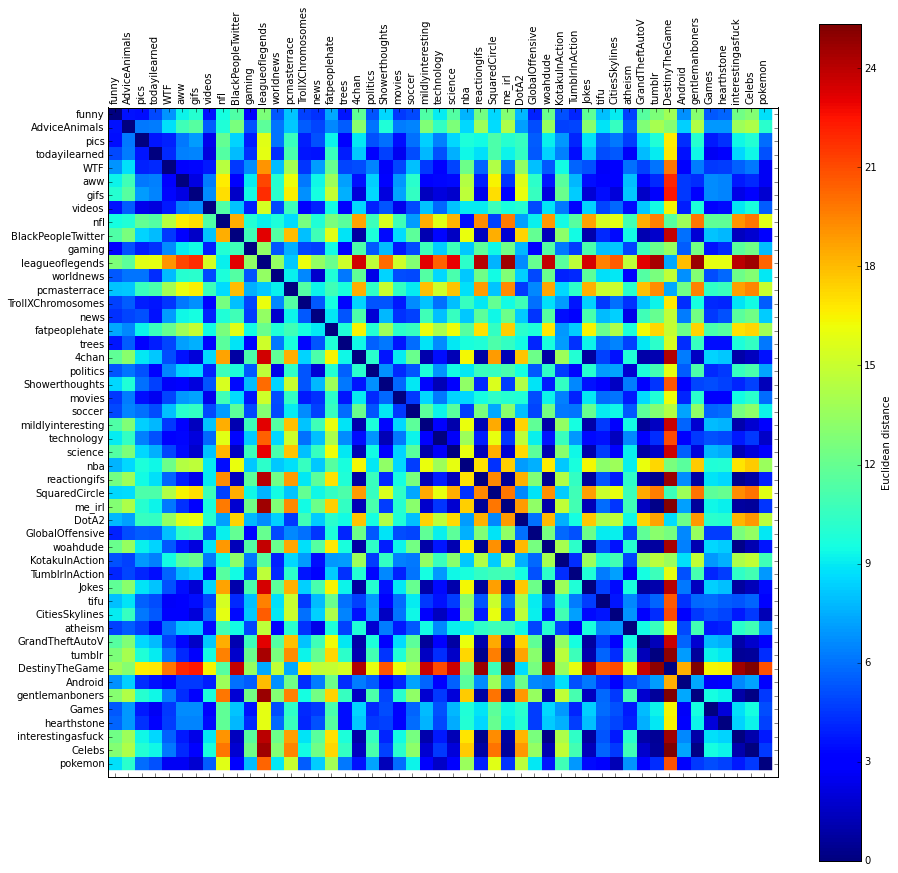

In [349]:
fig, ax = pp.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
tempDistMat = distMat.copy()
tempDistMat = np.delete(tempDistMat, 12, axis=1)
tempDistMat = np.delete(tempDistMat, 12, axis=0)
tempSubList = usedSubs[:]
tempSubList.pop(12)
axMat = ax.matshow(tempDistMat)
ax.set_xticks(range(len(distMat)))
ax.set_xticklabels(tempSubList, rotation=90);
ax.set_yticks(range(len(distMat)))
ax.set_yticklabels(tempSubList);
cbar = fig.colorbar(axMat)
cbar.set_label('Euclidean distance')

In [353]:
""" Plot most 10 most similar pairs"""
x = distMat.copy()
np.fill_diagonal(x, np.inf)
for ind in range(20):
    minInd = np.argmin(x)
    inds = np.unravel_index(minInd, distMat.shape)
    print usedSubs[inds[0]] + ', ' + usedSubs[inds[1]] + ': ' + str(x[inds])
    x[inds] = np.inf
    x[inds.reverse()] = np.inf

gentlemanboners, Celebs: 0.168315504864


AttributeError: 'tuple' object has no attribute 'reverse'

In [352]:
""" Plot most 10 most dissimilar pairs"""
x = distMat.copy()
np.fill_diagonal(x, -1*np.inf)
for ind in range(20):
    maxInd = np.argmax(x)
    inds = np.unravel_index(maxInd, distMat.shape)
    print usedSubs[inds[0]] + ', ' + usedSubs[inds[1]] + ': ' + str(x[inds])
    x[inds] = -1*np.inf

AskReddit, gentlemanboners: 61.9835626163
gentlemanboners, AskReddit: 61.9835626163
AskReddit, me_irl: 61.9300692357
me_irl, AskReddit: 61.9300692357
AskReddit, Celebs: 61.909553354
Celebs, AskReddit: 61.909553354
AskReddit, tumblr: 61.7297039977
tumblr, AskReddit: 61.7297039977
AskReddit, reactiongifs: 61.3829676915
reactiongifs, AskReddit: 61.3829676915
AskReddit, interestingasfuck: 61.3344727619
interestingasfuck, AskReddit: 61.3344727619
AskReddit, woahdude: 61.1857710586
woahdude, AskReddit: 61.1857710586
AskReddit, 4chan: 60.8541845565
4chan, AskReddit: 60.8541845565
AskReddit, Jokes: 60.7852114226
Jokes, AskReddit: 60.7852114226
AskReddit, GrandTheftAutoV: 60.5108600413
GrandTheftAutoV, AskReddit: 60.5108600413


In [327]:
x = distMat
np.fill_diagonal(x,np.inf)
np.argmin(x)
a = np.unravel_index(np.argmin(x), x.shape)
x[a]

0.16831550486372382

In [334]:
-1*np.inf

-inf

In [339]:
inds

(40, 12)

In [342]:
usedSubs

[u'funny',
 u'AdviceAnimals',
 u'pics',
 u'todayilearned',
 u'WTF',
 u'aww',
 u'gifs',
 u'videos',
 u'nfl',
 u'BlackPeopleTwitter',
 u'gaming',
 u'leagueoflegends',
 u'AskReddit',
 u'worldnews',
 u'pcmasterrace',
 u'TrollXChromosomes',
 u'news',
 u'fatpeoplehate',
 u'trees',
 u'4chan',
 u'politics',
 u'Showerthoughts',
 u'movies',
 u'soccer',
 u'mildlyinteresting',
 u'technology',
 u'science',
 u'nba',
 u'reactiongifs',
 u'SquaredCircle',
 u'me_irl',
 u'DotA2',
 u'GlobalOffensive',
 u'woahdude',
 u'KotakuInAction',
 u'TumblrInAction',
 u'Jokes',
 u'tifu',
 u'CitiesSkylines',
 u'atheism',
 u'GrandTheftAutoV',
 u'tumblr',
 u'DestinyTheGame',
 u'Android',
 u'gentlemanboners',
 u'Games',
 u'hearthstone',
 u'interestingasfuck',
 u'Celebs',
 u'pokemon']

In [341]:
usedSubs = subList[0:50]